In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.shape

(891, 12)

In [8]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

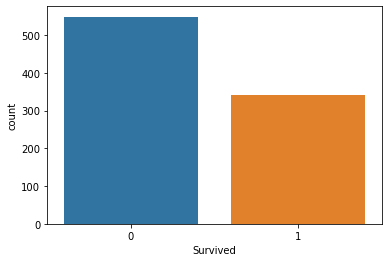

In [9]:
sns.countplot(x = 'Survived', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

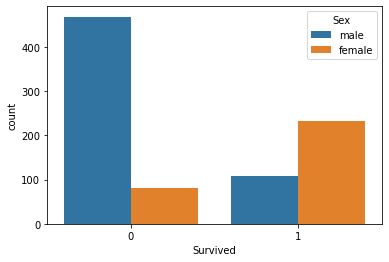

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

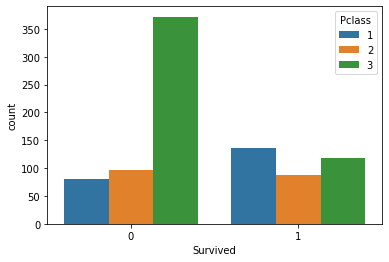

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)

In [13]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [15]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Density'>

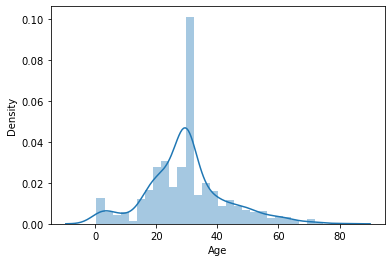

In [18]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

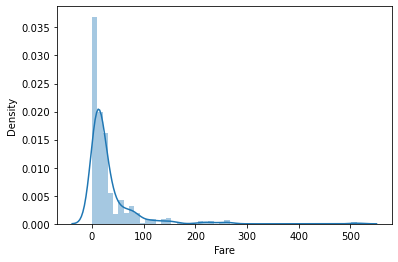

In [28]:
sns.distplot(data['Fare'])

In [19]:
class_fare = data.pivot_table(index = 'Pclass', values = 'Fare')

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

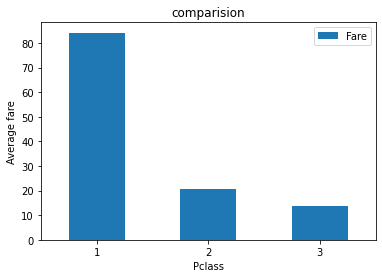

In [20]:
class_fare.plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel('Average fare')
plt.title('comparision')
plt.xticks(rotation = 0)

In [21]:
class_fare = data.pivot_table(index = 'Pclass', values = 'Fare', aggfunc = np.sum)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

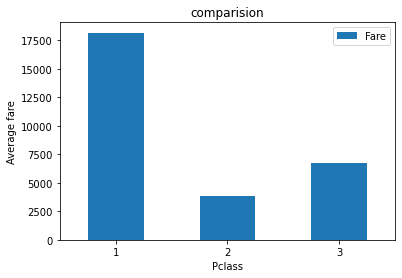

In [32]:
class_fare.plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel('Average fare')
plt.title('comparision')
plt.xticks(rotation = 0)


In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for i in cols:
    data[i] = le.fit_transform(data[i])
    

In [50]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,NaN,2


In [38]:
data = data.drop(columns = ['Name', 'Ticket'], axis = 1)

KeyError: "['Name', 'Ticket'] not found in axis"

In [39]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,NaN,2


In [51]:
x = data.drop(['Survived'], axis = 1)

In [52]:
y = data['Survived']

In [53]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,0,38.0,1,0,71.2833,C85,0
2,3,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,0,35.0,1,0,53.1000,C123,2
4,5,3,1,35.0,0,0,8.0500,NaN,2


In [54]:
y.head(), type(y)

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64,
 pandas.core.series.Series)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 94)

In [63]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_train

ValueError: could not convert string to float: 'C52'

In [47]:
pred_test = lr.predict(x_test)
pred_test

ValueError: could not convert string to float: 'D45'

In [65]:
accuracy_score = accuracy_score(y_train, pred_train)
print(accuracy_score)

TypeError: 'numpy.float64' object is not callable

In [66]:
accuracy_score = accuracy_score(y_test, pred_test)
accuracy_score

TypeError: 'numpy.float64' object is not callable

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_test))

NameError: name 'pred_test' is not defined

In [48]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
ls = accuracy_score(y_test, pred_lr)

ValueError: could not convert string to float: 'D45'